In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
data = data.fillna(0)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

EDA

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

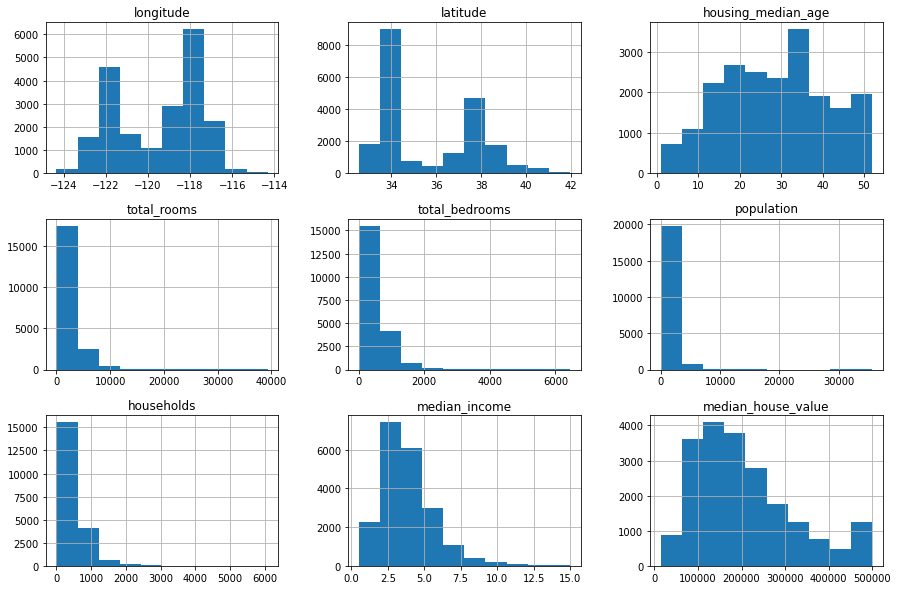

In [7]:
data.hist(figsize=(15,10))

In [8]:
numerical_features=data.select_dtypes(include=[np.number])
print(f'this dataset have {numerical_features.shape[1]} numerical features :')
numerical_features.dtypes

this dataset have 9 numerical features :


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [9]:
numerical_features.corr()['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049148
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Text(0.5, 1.0, 'correlación entre columnas de datos numericos')

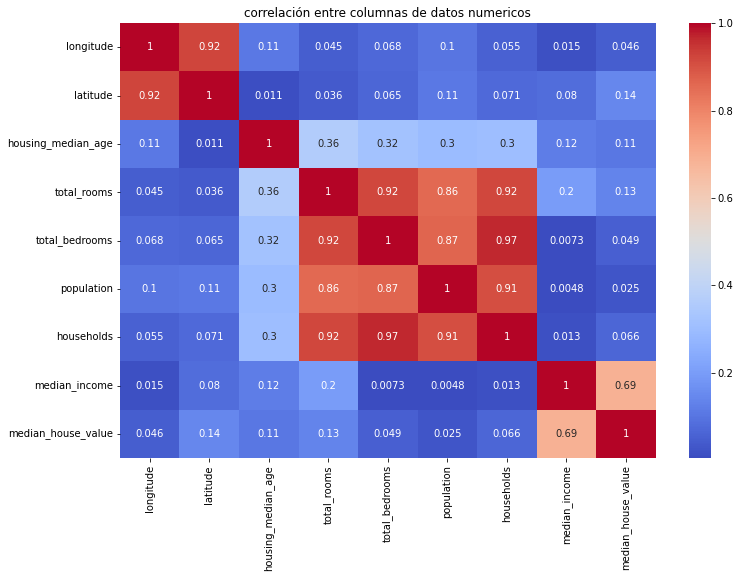

In [10]:
plt.figure(figsize=(12,8))
sb.heatmap(data=numerical_features.corr().abs(),annot=True,cmap='coolwarm')
plt.title("correlación entre columnas de datos numericos")

elementos con mayor correlacion entre ellos son: 

- total_rooms, total_bedrooms,population,households.

- median_income con median_house_value

- latitud y longitud

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

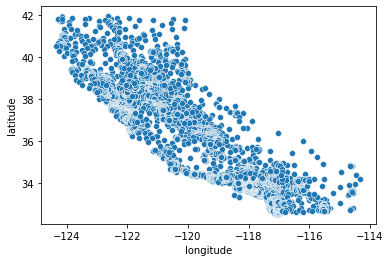

In [11]:
sb.scatterplot(x='longitude',y='latitude',data=numerical_features)

nos da la posición de las casas en california

In [12]:
relacion = data[['total_rooms','total_bedrooms','population','households','ocean_proximity']]

<Figure size 432x288 with 0 Axes>

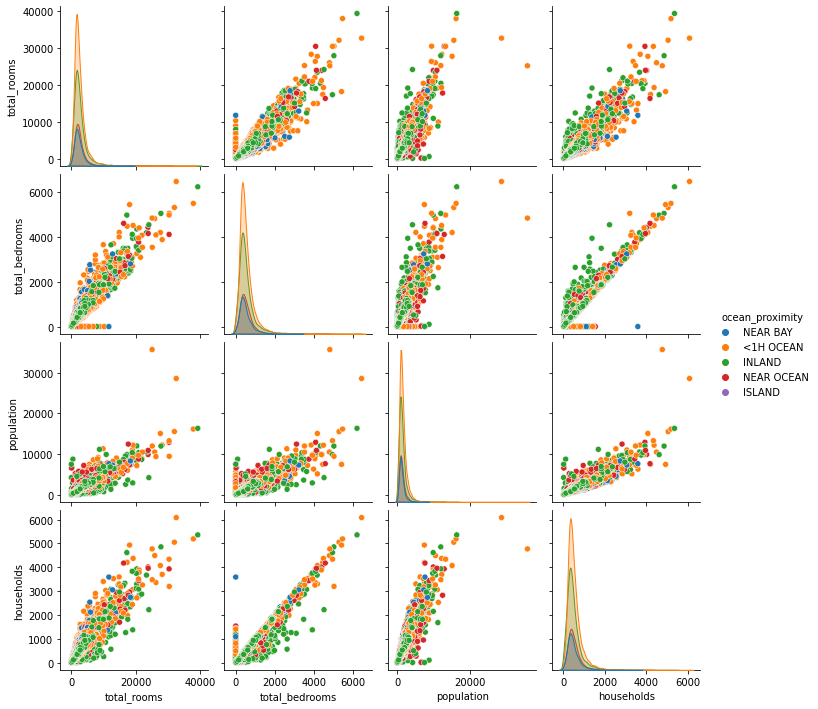

In [13]:
plt.figure()
sb.pairplot(relacion,hue='ocean_proximity')
plt.show()

Text(0.5, 1.0, 'valor medio de las casas vs valor de ingreso economico')

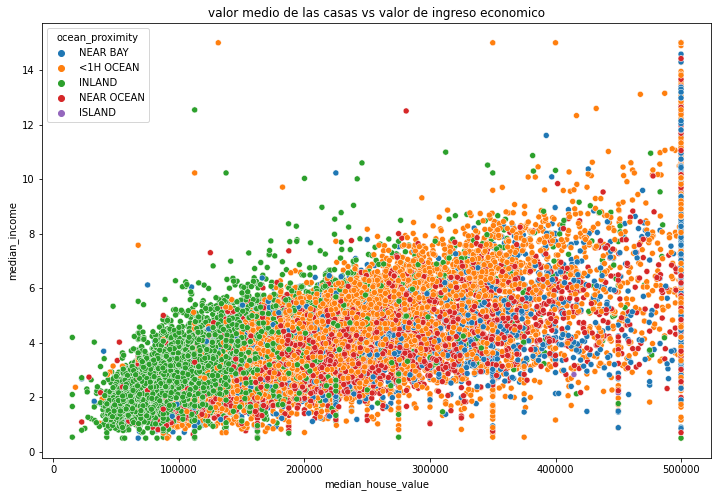

In [14]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=data[['median_income','median_house_value','ocean_proximity']],x='median_house_value',
               y='median_income',hue='ocean_proximity')
plt.title('valor medio de las casas vs valor de ingreso economico')

variables dummy y prepocesamiento de los datos

In [15]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
categorical_data = data[['ocean_proximity']]
data_numerical = data.drop('ocean_proximity',axis=1)

In [17]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(data_numerical)
data_column = imputer.transform(data_numerical)

In [18]:
#convirtiendo a un dataset
data_num = pd.DataFrame(data_column,columns=data_numerical.columns)
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [19]:
sc_X = StandardScaler()
scalar = sc_X.fit_transform(data_numerical)
scalar

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [20]:
columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms',	
           'population','households','median_income','median_house_value']
index = np.arange(20640)
data_numerical = pd.DataFrame(scalar,index=index, columns=columns)

In [21]:
categorical = OneHotEncoder()
data_str = categorical.fit_transform(categorical_data)
data_str = data_str.toarray()
print(data_str)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [26]:
index = np.arange(20640)

In [27]:
data_tr = pd.DataFrame(data_str,index=index,columns=['columna1','columna2','columna3','columna4','columna5'])
data_tr

,columna1,columna2,columna3,columna4,columna5
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [29]:
data2 = data_numerical.join(data_tr)
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,columna1,columna2,columna3,columna4,columna5
0,-1.327835,1.052548,0.982143,-0.804819,-0.954593,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.356913,0.861439,1.669961,2.332238,1.314156,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.810272,-0.820777,-0.843637,1.782699,1.258693,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.703806,-0.766028,-0.733781,0.932968,1.165100,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.597339,-0.759847,-0.629157,-0.012881,1.172900,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.374942,-0.512592,-0.443449,-1.216128,-1.115804,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.904909,-0.944405,-1.008420,-0.691593,-1.124470,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.112325,-0.369537,-0.174042,-1.142593,-0.992746,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.292135,-0.604429,-0.393753,-1.054583,-1.058608,0.0,1.0,0.0,0.0,0.0


In [30]:
X = data2.drop(['median_house_value'],axis=1)
y = data2['median_house_value']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

creamos los modelos de regresion lineal, multilineal y polinomial

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [33]:
# modelo lineal
multilineal_model = LinearRegression()
multilineal_model.fit(X_train,y_train)
Y_predict1 = multilineal_model.predict(X_test)

simple_linear_score = r2_score(y_test,Y_predict1)*100
print(simple_linear_score)

63.683889466341604


In [34]:
#modelo arbol de regresion
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(criterion='squared_error',random_state=0)
tree_model.fit(X_train,y_train)
Y_predict2 = tree_model.predict(X_test)

tree_regression_score = r2_score(y_test,Y_predict2)*100
print(tree_regression_score)

62.36484336386505


In [37]:
#support vector regression
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf')
model_svr.fit(X_train,y_train)


SVR()

In [38]:
Y_predict3 = model_svr.predict(X_test)
score_svr = r2_score(y_test,Y_predict3)*100
print(score_svr)

76.05081193756304
